<h1 style="color: #5e9ca0; text-align: center;">Química Analítica</h1>
<h2 style="color: #2e6c80; text-align: center;">Curva de titulação de Ácido Acético (ácido fraco) e NaOH (base forte)</h2></br>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.10f}'.format

# mostrando todas as colunas do dataframe
pd.set_option('display.max_columns', None)
# mostrando todas as linhas do dataframe
pd.set_option('display.max_rows', 20)

In [40]:
#
# Dados iniciais
#
c_base = 0.1000 # concentração da base (NaOH)
c_acido = 0.1000 # concentração do ácido acético
v_acido = 0.05 # (50 mL) volume do ácido
v_base_adicionada = 0.00 # controla a qtde de base adicionada

In [41]:
#
# Dataframe com lista de acidos fracos
#
acidos_fracos = {"Acidos" : 
                 ["CH3COOH"],
                "Ka" : [1.75*10**-5]}
df_acidos_fracos = pd.DataFrame(acidos_fracos)
df_acidos_fracos

,Acidos,Ka
0,CH3COOH,0.0000175000


<h2 style="color: #2e6c80; text-align: center;">Gerando Dados</h2></br>

In [42]:
# df = df_acidos_fracos.loc[(df_acidos_fracos["Acidos"] == "CH3COOH") | (df_acidos_fracos["Acidos"] == "H3PO43")]

resultados = []
for index, row in df_acidos_fracos.iterrows():
    acido = row['Acidos']
    ka = row['Ka']
    pH = 0
    concentracao_H30 = 0
    # Considerando que uma gota teria aproximadamente 0,05 mL
    for volume_da_base_ad in np.arange(0, 0.1205, 0.00005): # volume em Litros
        if volume_da_base_ad == 0:
            # No ponto inicial (sem adição de NaOH)
            concentracao_H3O = np.sqrt(ka * c_acido)
            pH = -np.log10(concentracao_H3O)
            
            # adicionando resultado
            resultados.append([acido, np.around(pH, 5), volume_da_base_ad])
        else:
            if volume_da_base_ad < 0.05:
                # formação de uma solução tampão
                # antes do ponto de equivalência
                concentracao_sal = (c_base * volume_da_base_ad) / (v_acido + volume_da_base_ad)
                concentracao_acido = ((c_acido * v_acido) - (c_base * volume_da_base_ad)) / (v_acido + volume_da_base_ad)
                log_sal_acido = np.log10(concentracao_sal / concentracao_acido)
                pka = -np.log10(ka)
                pH = pka + log_sal_acido

                # adicionando resultado
                resultados.append([acido, np.around(pH, 5), volume_da_base_ad])
            else:
                if volume_da_base_ad == 0.05:
                    # Estamos no ponto de equivalência (PE)
                    # o pH é determinado pela hidrólise do sal formado
                    concentracao_sal = (c_base * volume_da_base_ad) / (v_acido + volume_da_base_ad)
                    kb =  (1.00 * 10**-14) / (ka)
                    concentracao_OH = np.sqrt(kb * concentracao_sal)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14.0000 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 5), volume_da_base_ad])
                else:
                    # Excesso de NaOH (inibe a hidrólise do sal)
                    concentracao_OH = ( (c_base * volume_da_base_ad) - (c_acido * v_acido) ) / (v_acido + volume_da_base_ad)
                    pOH = -np.log10(concentracao_OH)
                    pH = 14.0000 - pOH

                    # adicionando resultado
                    resultados.append([acido, np.around(pH, 5), volume_da_base_ad]) 

In [43]:
# Dataframe de resultados
df_resultados = pd.DataFrame(resultados, columns=["Acido", "pH", "Volume"])

In [44]:
df_resultados.loc[(df_resultados["Acido"] == "CH3COOH")]

,Acido,pH,Volume
0,CH3COOH,2.8784800000,0.0000000000
1,CH3COOH,1.7574000000,0.0000500000
2,CH3COOH,2.0588600000,0.0001000000
3,CH3COOH,2.2353900000,0.0001500000
4,CH3COOH,2.3607600000,0.0002000000
...,...,...,...
2405,CH3COOH,12.6155600000,0.1202500000
2406,CH3COOH,12.6157400000,0.1203000000
2407,CH3COOH,12.6159200000,0.1203500000
2408,CH3COOH,12.6161000000,0.1204000000


In [45]:
df_resultados.loc[(df_resultados["Acido"] == "CH3COOH") & (df_resultados["Volume"] == 0.05)]

,Acido,pH,Volume
1000,CH3COOH,8.7279700000,0.0500000000


In [46]:
lista_y = np.arange(0, 14, 1)
lista_y = np.append(lista_y, [8.728]) 
lista_y.sort()
lista_y

array([ 0.   ,  1.   ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,  7.   ,
        8.   ,  8.728,  9.   , 10.   , 11.   , 12.   , 13.   ])

<h1 style="color: #2e6c80; text-align: center;">Gráfico</h1></br>

<h2>Ácido acético -  $CH_{3}COOH$</h2>

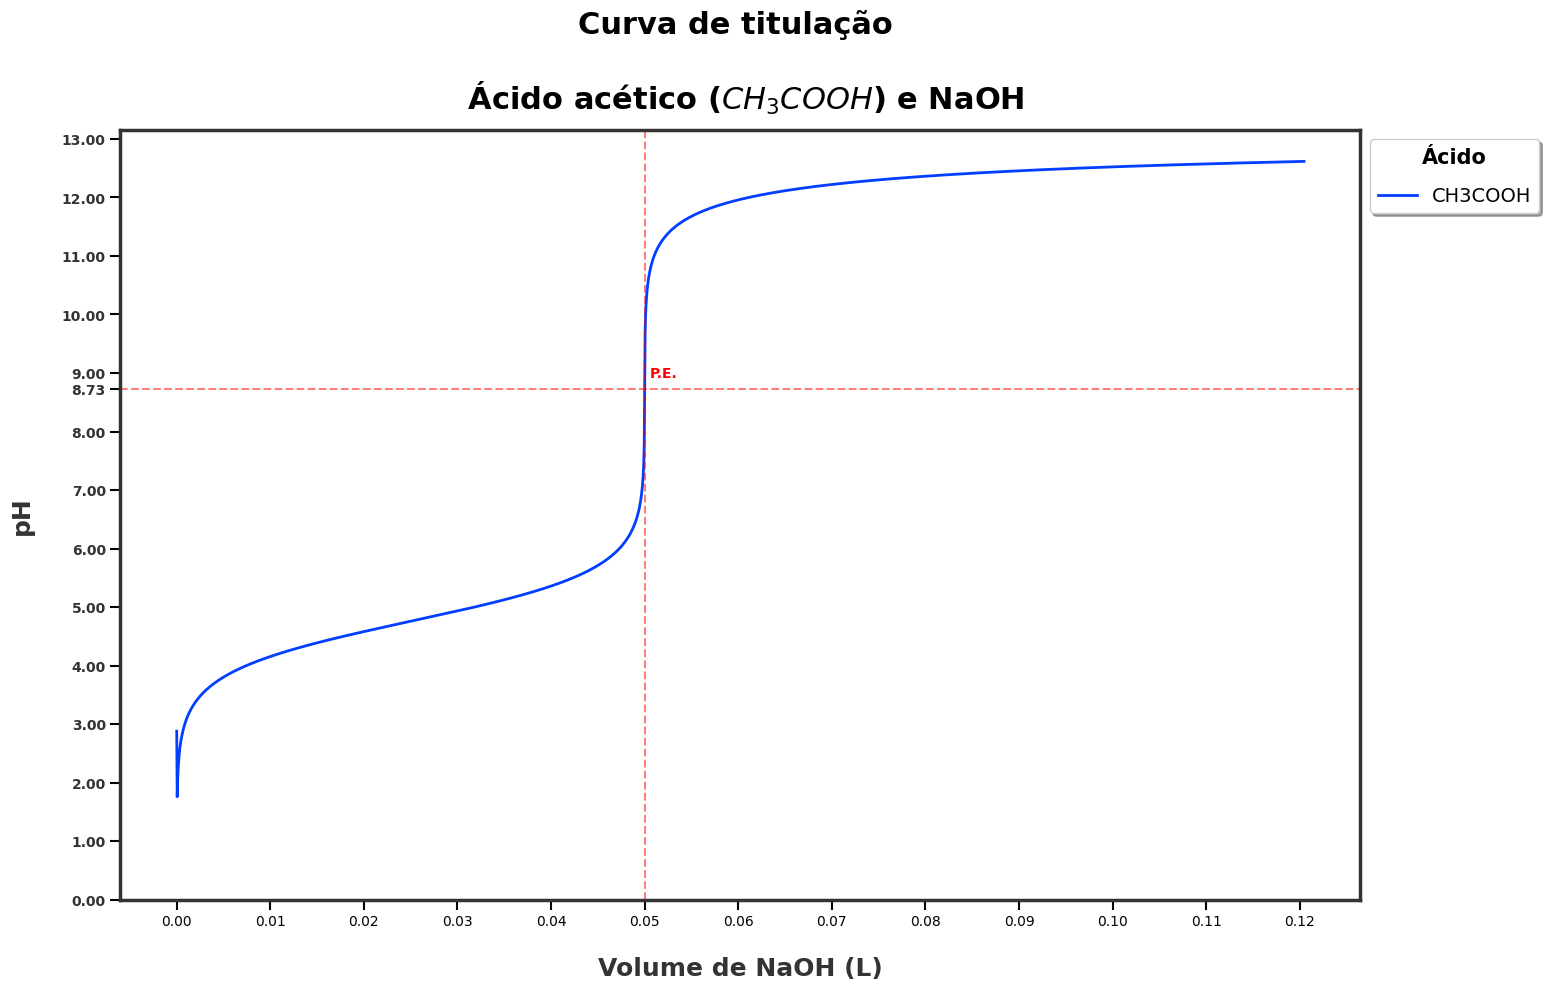

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df_dados = df_resultados.loc[(df_resultados["Acido"] == "CH3COOH")]
sns.lineplot(data = df_dados, 
             x = "Volume",
             y = "pH",
             hue="Acido", 
             palette="bright",
             linewidth = 2)

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(0, 0.125, 0.01))

ax.yaxis.set_ticks_position('left')
lista_y = np.arange(0, 14, 1)
lista_y = np.append(lista_y, [8.728])
lista_y.sort()
ax.yaxis.set_ticks(lista_y)

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y
plt.yticks(size = 10, weight = 'bold', color = '0.2')

ax.set_ylabel('pH', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Volume de NaOH (L)', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

# Título do gráfico
ax.set_title("Curva de titulação \n \n Ácido acético ($CH_{3}COOH$) e NaOH", 
             fontweight = 'bold', 
             fontsize = 22, 
             pad = 15)

sns.move_legend(ax, "upper left", 
                bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Ácido",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

#plt.axvline(0, color='r')
plt.axhline(8.728, color='r', ls="--", alpha=0.5)
plt.axvline(0.050, color='r', ls="--", alpha=0.5)

texto = "P.E."
ax.text(0.052, 9.0, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Salvando gráfico
plt.savefig('curvas_de_titulacao_ac_acetico_e_hidroxido_de_sodio.png', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())

# Exibindo o gráfico
plt.show()